# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load dataset

In [25]:
df = pd.read_csv("HouseDetails.csv")
print(df.head())

   bhk propertytype   location   sqft  pricepersqft  totalprice
0    3         Flat  Ahmedabad   1346          6233    15700000
1    4         Flat  Ahmedabad   1872          4873    17500000
2    4         Flat  Ahmedabad   1650          6733    20200000
3    5         Flat  Ahmedabad  10201          8499    86700000
4    3         Flat  Ahmedabad    968          5944    10400000


# Exploratory Data Analysis (EDA)

In [26]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())

Dataset shape: (14119, 6)

Data types:
 bhk              int64
propertytype    object
location        object
sqft             int64
pricepersqft     int64
totalprice       int64
dtype: object

Missing values:
 bhk             0
propertytype    0
location        0
sqft            0
pricepersqft    0
totalprice      0
dtype: int64

Unique values per column:
 bhk               10
propertytype       3
location          56
sqft            2025
pricepersqft    5707
totalprice      1185
dtype: int64


# Visualize distributions

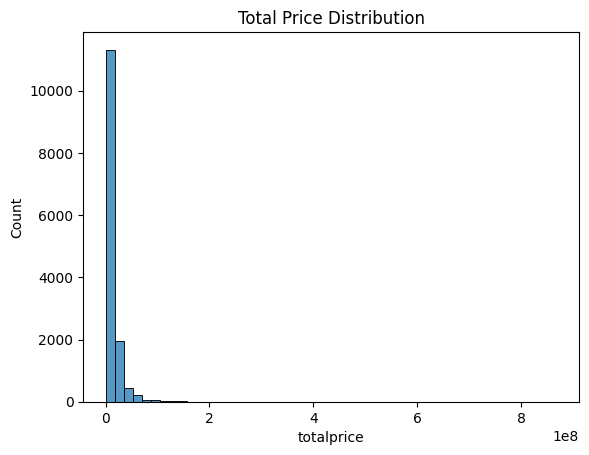

In [27]:
sns.histplot(df['totalprice'], bins=50)
plt.title('Total Price Distribution')
plt.show()

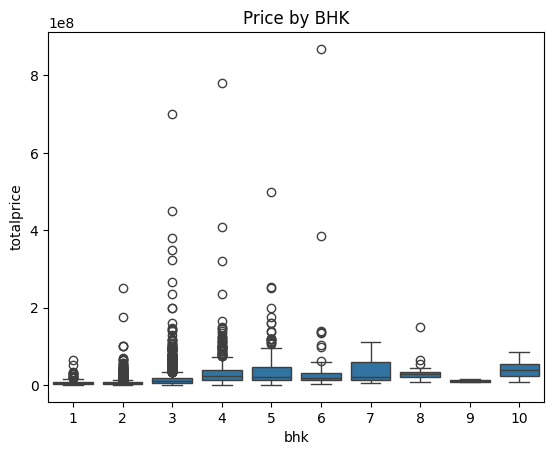

In [28]:
sns.boxplot(data=df, x='bhk', y='totalprice')
plt.title('Price by BHK')
plt.show()

# Data Preprocessing

### Handle missing values

In [29]:
df.dropna(inplace=True)

### Encode Label

In [30]:
le_property = LabelEncoder()
le_location = LabelEncoder()
df['propertytype'] = le_property.fit_transform(df['propertytype'])
df['location'] = le_location.fit_transform(df['location'])

### Feature Selection

In [31]:
X = df.drop(['totalprice'], axis=1)
final_feature_columns = X.columns.tolist()
y = df['totalprice']

### Normalization

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into Train and Test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building

In [34]:
LinearReg = LinearRegression()
Decision_Tree = DecisionTreeRegressor(random_state=42)
RandForest = RandomForestRegressor(n_estimators=100, random_state=42)
GradBoost = GradientBoostingRegressor(n_estimators=100, random_state=42)
KNN = KNeighborsRegressor(n_neighbors=5)

# Train and evaluate the model

In [35]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"\nMAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

### KNN

In [36]:
evaluate_model('K-Nearest Neighbour', KNN, X_train, y_train, X_test, y_test)

Model: K-Nearest Neighbour

MAE: 5236060.99
MSE: 487377344595169.56
RMSE: 22076624.39
R² Score: 0.2227


### Decision Tree Regressor

In [37]:
evaluate_model('Decision Tree Regressor', Decision_Tree, X_train, y_train, X_test, y_test)

Model: Decision Tree Regressor

MAE: 6921703.05
MSE: 539760830346086.50
RMSE: 23232753.40
R² Score: 0.1392


### Random Forest Regressor

In [38]:
evaluate_model('Random Forest Regressor', RandForest, X_train, y_train, X_test, y_test)

Model: Random Forest Regressor

MAE: 5527564.75
MSE: 450455638748993.19
RMSE: 21223940.23
R² Score: 0.2816


### Gradient Booster

In [39]:
evaluate_model('Gradient Booster Regressor', GradBoost, X_train, y_train, X_test, y_test)

Model: Gradient Booster Regressor

MAE: 5626856.90
MSE: 433357104222924.88
RMSE: 20817230.95
R² Score: 0.3089


### Linear Regression

In [40]:
evaluate_model('Linear Regression', LinearReg, X_train, y_train, X_test, y_test)

Model: Linear Regression

MAE: 8867418.12
MSE: 575299116732056.62
RMSE: 23985393.82
R² Score: 0.0825


# Predicting New House Price

In [41]:
def User_input(bhk,propertytype,location,sqft,pricepersqft): 
    user_input = {
        'bhk': bhk,
        'propertytype': propertytype,
        'location': location,
        'sqft': sqft,
        'pricepersqft': pricepersqft
     }
    

    # Convert to DataFrame
    input_df = pd.DataFrame([user_input])

    # Combine with training data to apply same preprocessing
    combined_df = pd.concat([X, input_df], ignore_index=True)

    # --- Preprocess input ---
    # 1. One-hot encode categorical columns (same as training)
    combined_df = pd.get_dummies(combined_df, columns=['propertytype', 'location'])

    # 2. Align with training data columns
    combined_df = combined_df.reindex(columns=final_feature_columns, fill_value=0)

    # 3. Scale the features (use the same fitted scaler)
    input_scaled = scaler.transform(combined_df)

    # 4. Extract the last row (user input)
    input_scaled = input_scaled[-1].reshape(1, -1)

    predicted_price = GradBoost.predict(input_scaled)

    return predicted_price

# Save The Model

In [44]:
import joblib

# Save model and preprocessors
joblib.dump(GradBoost, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_location, "label_encoders/location_encoder.pkl")
joblib.dump(le_property, "label_encoders/propertytype_encoder.pkl")

['label_encoders/propertytype_encoder.pkl']